In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("kc_house_data.csv")
dt = df.drop(["yr_built", "yr_renovated", "zipcode", "lat", "long"], axis=1)
dt.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503


In [4]:
### Explatorary Data

In [24]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 2.6+ MB


In [25]:
dt.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [26]:
dt.shape

(21613, 16)

In [27]:
dt.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


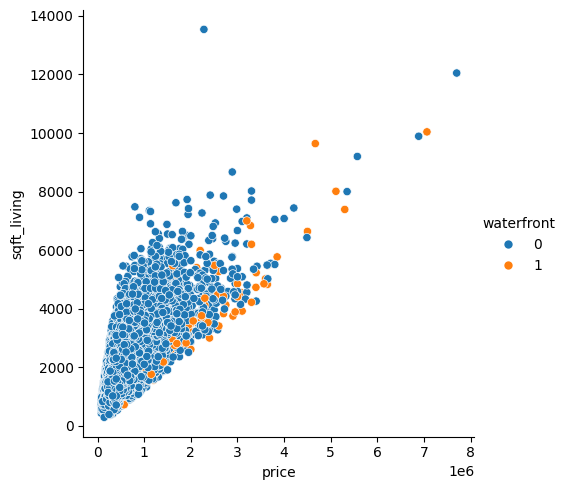

In [28]:
sns.relplot(x='price', y='sqft_living', hue='waterfront', data=dt)
plt.show()

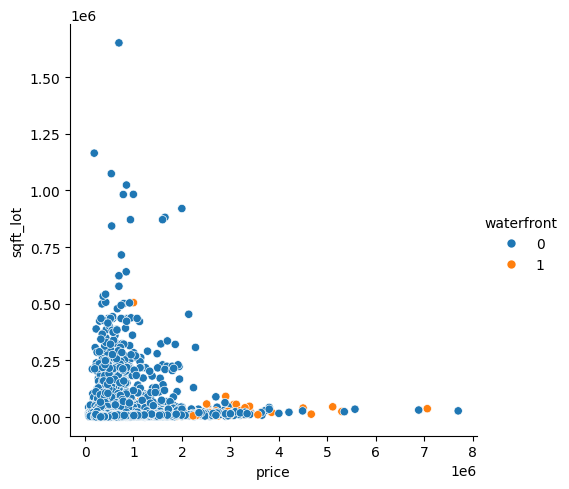

In [29]:
sns.relplot(x='price', y='sqft_lot', hue='waterfront', data=dt)
plt.show()

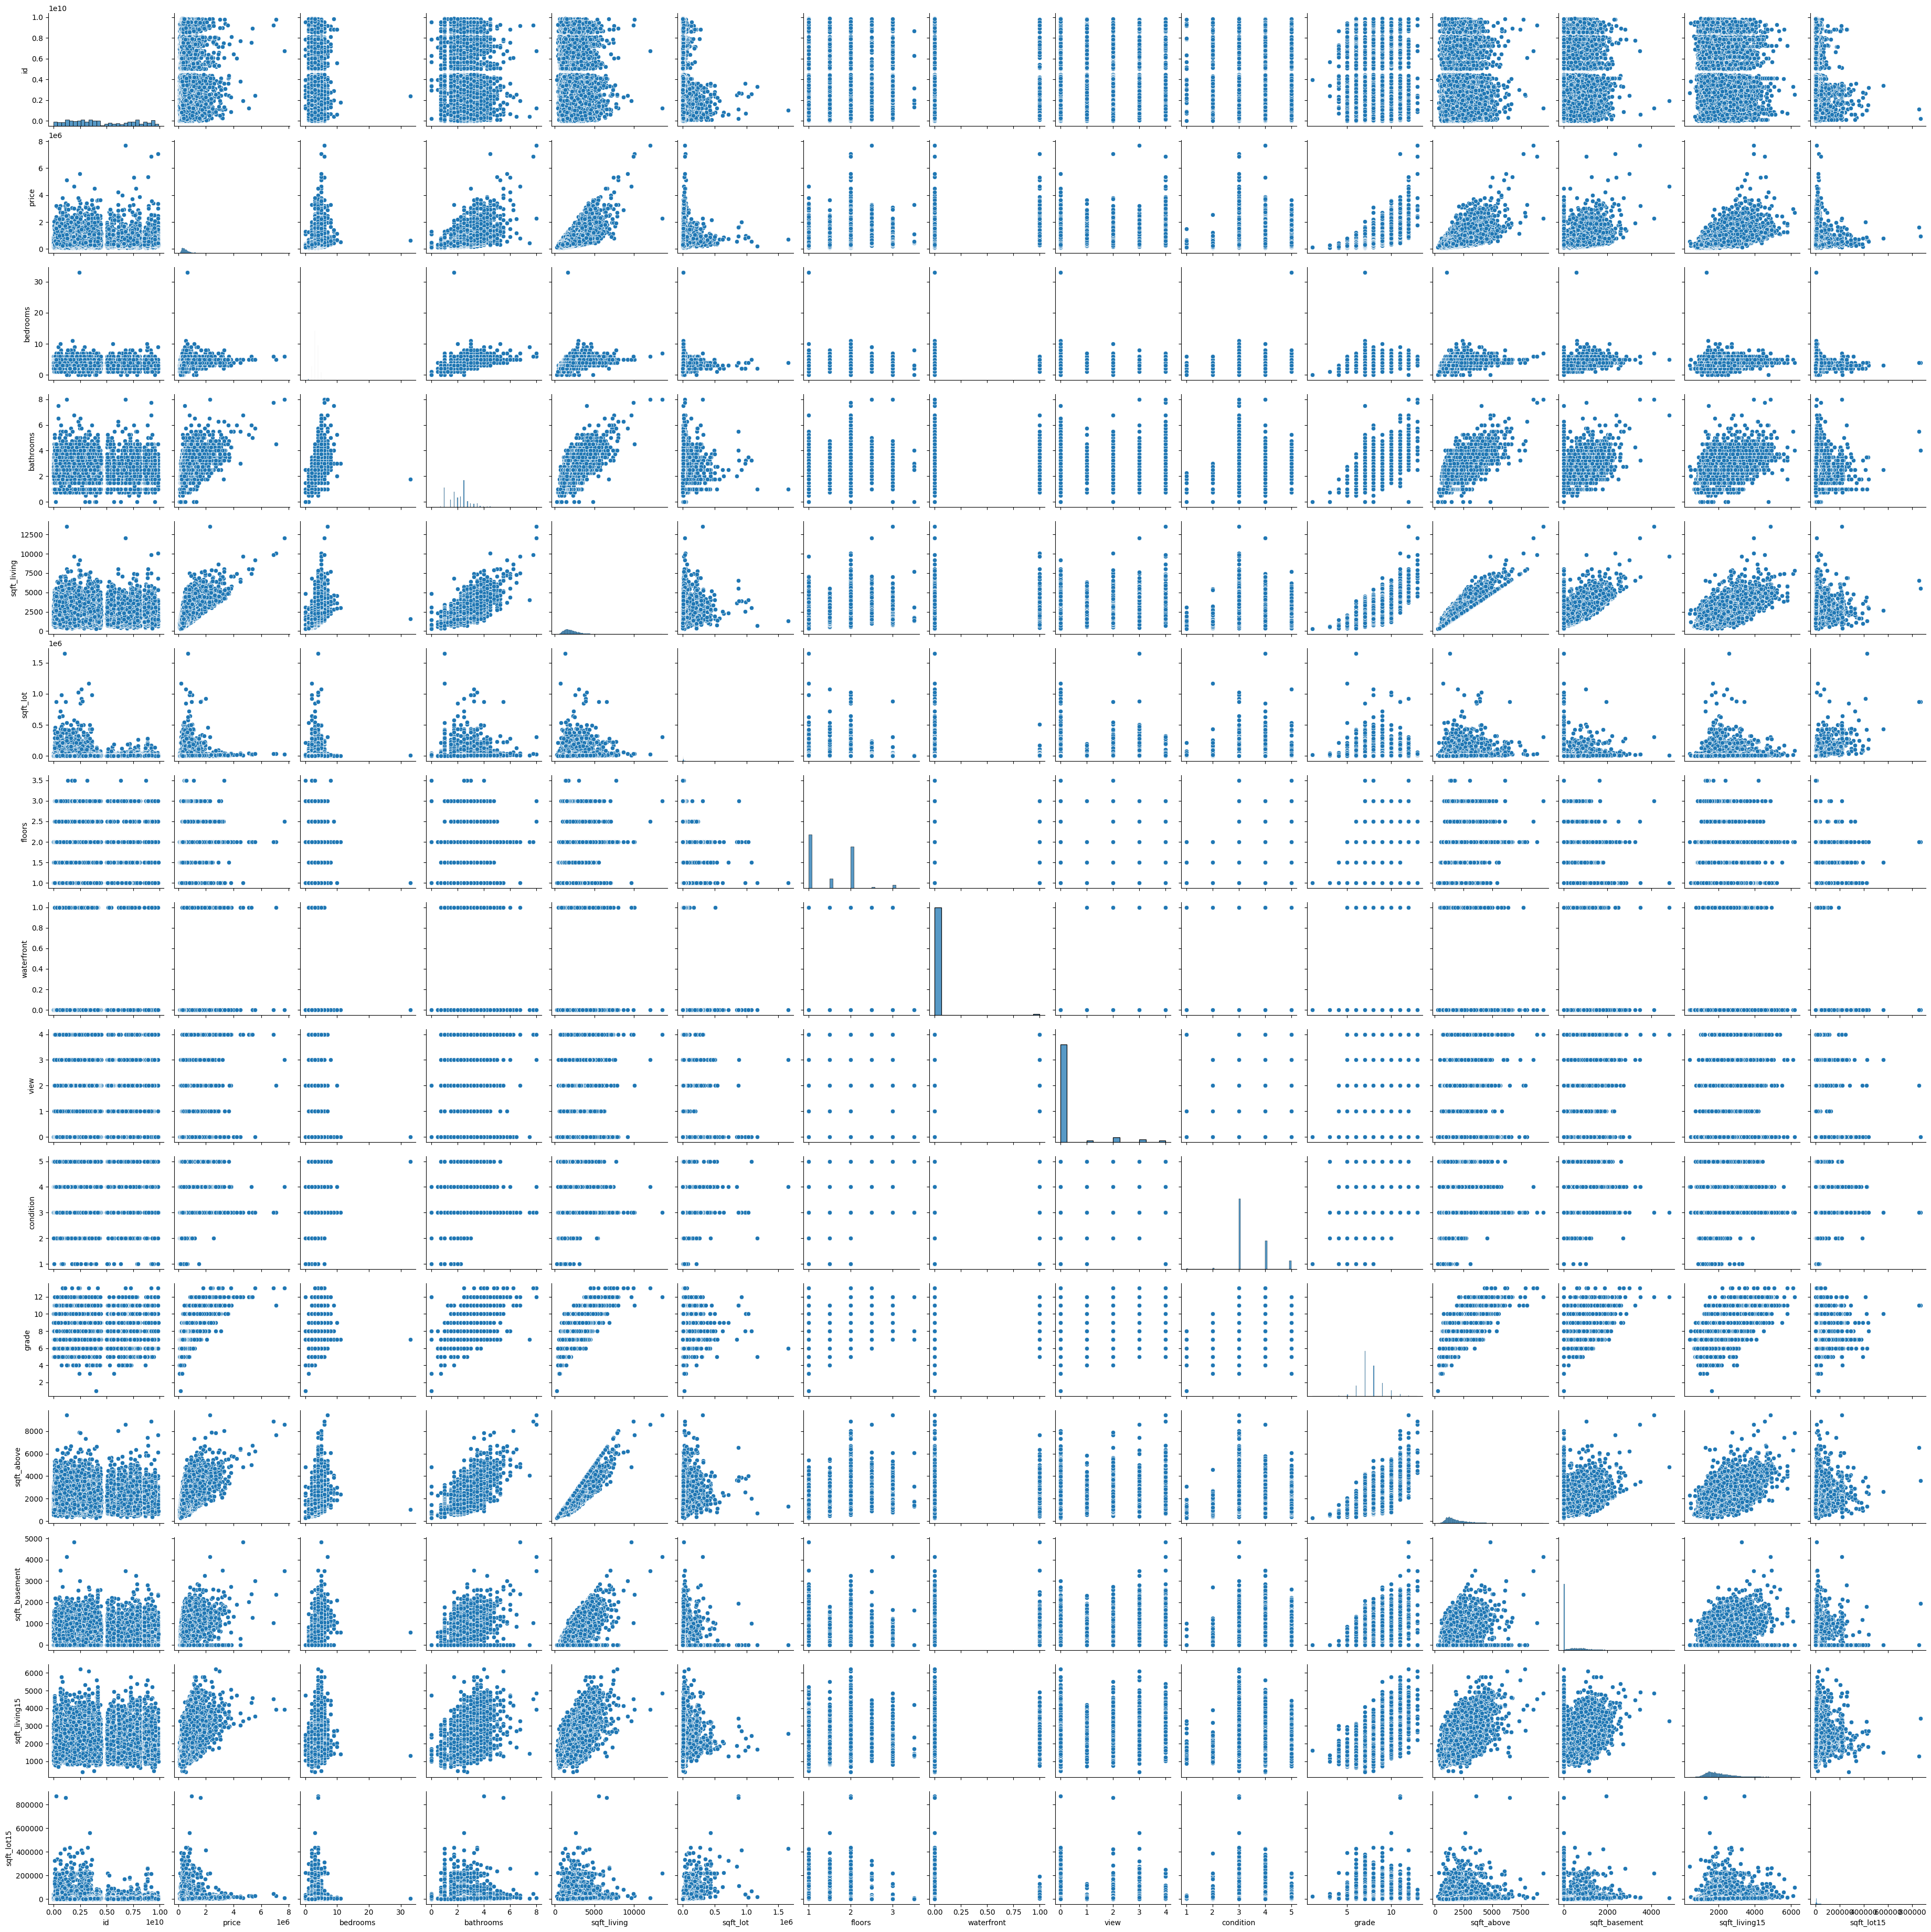

In [30]:
sns.pairplot(dt)

<Axes: >

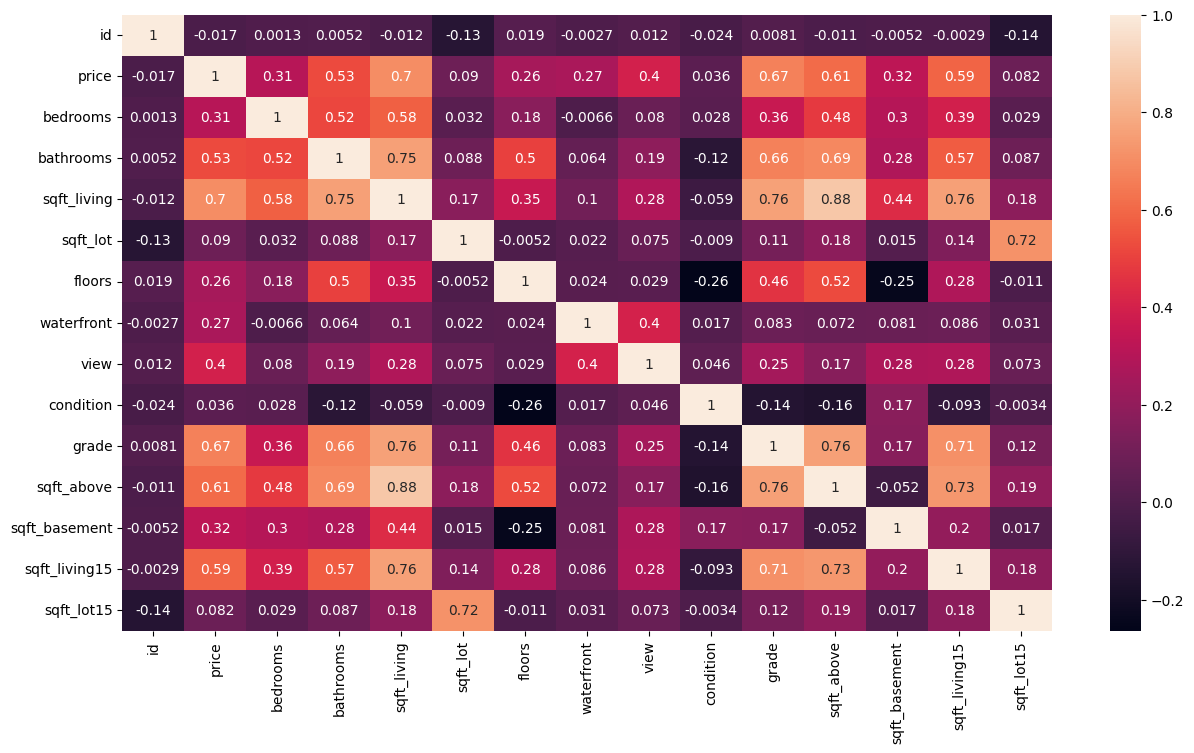

In [35]:
plt.figure(figsize =(15,8))
sns.heatmap(dt.drop(["date"], axis=1).corr(), annot=True)

In [ ]:
### data modelling

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [113]:
x = dt.drop(["price", "date", "id"],axis=1)
y = dt["price"]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
### Linear Regression

In [115]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [116]:
predict = lin.predict(X_test)
predict

array([ 496786.09274463,  508645.91117741, -503153.99680748, ...,
        393503.57914579,  313496.67469626,  456513.33750452])

In [117]:
lin.score(X_test, y_test)

0.6066342769831252

In [118]:
lin.score(X_train, y_train)

0.6064845192674768

In [119]:
mae = mean_squared_error(y_test, predict)
mae

54258273877.49545

In [120]:
data_pred = pd.DataFrame({"y_test" : y_test, "predict" : predict})
data_pred

,y_test,predict
957,323000.0,496786.092745
14143,690000.0,508645.911177
19452,142000.0,-503153.996807
20510,560000.0,401225.406407
18354,545000.0,251619.804502
...,...,...
18435,589000.0,336626.032436
5508,578000.0,488147.645190
18067,435000.0,393503.579146
13245,492000.0,313496.674696


In [ ]:
### Random Forest Regressor

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
reg = RandomForestRegressor(n_estimators = 1000, random_state = 50)
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=50)

In [135]:
predictRF = reg.predict(X_test)
predictRF

array([416148.47      , 647251.497     , 191351.53333333, ...,
       493929.516     , 412277.4415    , 415955.056     ])

In [136]:
reg.score(X_train, y_train)

0.9598564133192914

In [137]:
reg.score(X_test, y_test)

0.7361573883686735

In [139]:
mapeRF = mean_absolute_percentage_error(y_test, predictRF)
mapeRF

0.24946664169037105

In [143]:
dataFrame = pd.DataFrame({"y_test" : y_test, "predict" : predictRF})
dataFrame.sort_index(ascending = True, inplace = True)
dataFrame

,y_test,predict
0,221900.0,374700.582
7,291850.0,292634.921
9,323000.0,382237.610
13,400000.0,286928.300
16,395000.0,386244.804
...,...,...
21603,507250.0,428012.985
21604,429000.0,456961.619
21605,610685.0,518261.336
21607,475000.0,464898.512


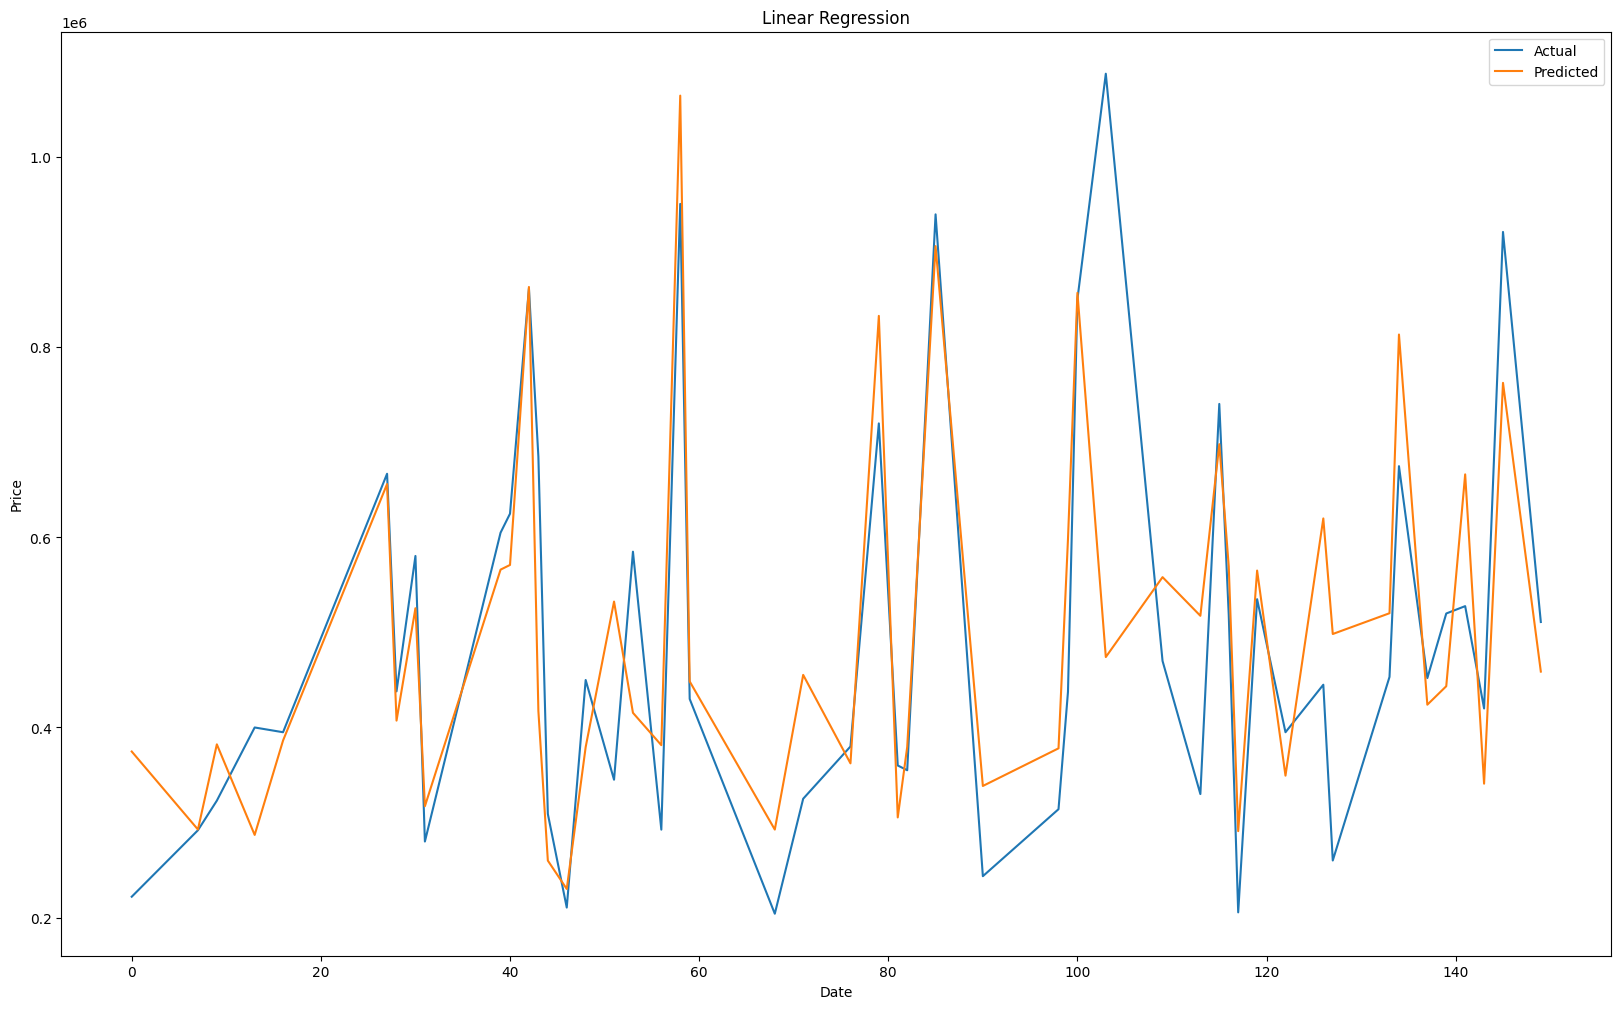

In [150]:
plt.figure(figsize= (20,12))
plt.plot(dataFrame[:50])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend(['Actual','Predicted'])
plt.show()

In [1]:
import streamlit as st

ModuleNotFoundError: No module named 'streamlit'